<a href="https://colab.research.google.com/github/bnkv66/bnk_projeccts/blob/main/Exhibition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exhibition Data Analysis**

Importing libararies, Loading File

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the Excel file from your local desktop
uploaded = files.upload()

# Read the Excel file using the specified file path
df_sal = pd.read_excel('Exhibition_Leads_Analysis.xlsx', sheet_name='Main_Data')

Saving Exhibition_Leads_Analysis.xlsx to Exhibition_Leads_Analysis.xlsx


**Check the Dataframe**

In [21]:
df_sal.head(5)

,Location,Owner_Name,Product Prefered,Budget_Cat,Quote Stat,AmountFinalised
0,Coimbatore,Prithivaraj,Dysorm,High_budget,Q_given,2450000.0
1,Coimbatore,Pavi,Pecho,High_budget,Not_Given,0.0
2,Coimbatore,Karanakumar,Pecho,High_budget,Not_Given,0.0
3,Coimbatore,Sathiya,Dysorm,Low_budget,Not_Given,0.0
4,Coimbatore,Kumar,General,Check,Not_Given,0.0


**Targetting Cleaning Operation on the** **dataset**

In [5]:
# List of column names to clean
columns_to_clean = ['CustomerName', 'Location','Product Prefered','AmountFinalised' ]

# Iterate over the specified columns
for col in columns_to_clean:
    if col in df_sal.columns and df_sal[col].dtype == 'object':  # Check if the column exists and contains strings
        df_sal[col] = df_sal[col].str.strip()  # Strip white spaces from strings in the column

# Dropping Blank rows
df_sal.dropna(inplace=True)


# Print the updated DataFrame
df_sal.head(5)


,Location,Owner_Name,Product Prefered,Budget_Cat,Quote Stat,AmountFinalised
0,Coimbatore,Prithivaraj,Dysorm,High_budget,Q_given,2450000.0
1,Coimbatore,Pavi,Pecho,High_budget,Not_Given,0.0
2,Coimbatore,Karanakumar,Pecho,High_budget,Not_Given,0.0
3,Coimbatore,Sathiya,Dysorm,Low_budget,Not_Given,0.0
4,Coimbatore,Kumar,General,Check,Not_Given,0.0


In [7]:


# Replace NaN values with blank (empty) strings in the DataFrame df_sal
df_sal = df_sal.replace(['NaN', 'Nan', 'nan', 'NAN'], '')

# Print the DataFrame after replacing NaN values
df_sal.head(5)

,Location,Owner_Name,Product Prefered,Budget_Cat,Quote Stat,AmountFinalised
0,Coimbatore,Prithivaraj,Dysorm,High_budget,Q_given,2450000.0
1,Coimbatore,Pavi,Pecho,High_budget,Not_Given,0.0
2,Coimbatore,Karanakumar,Pecho,High_budget,Not_Given,0.0
3,Coimbatore,Sathiya,Dysorm,Low_budget,Not_Given,0.0
4,Coimbatore,Kumar,General,Check,Not_Given,0.0


**Distribution City wise & focus after Exhibition**

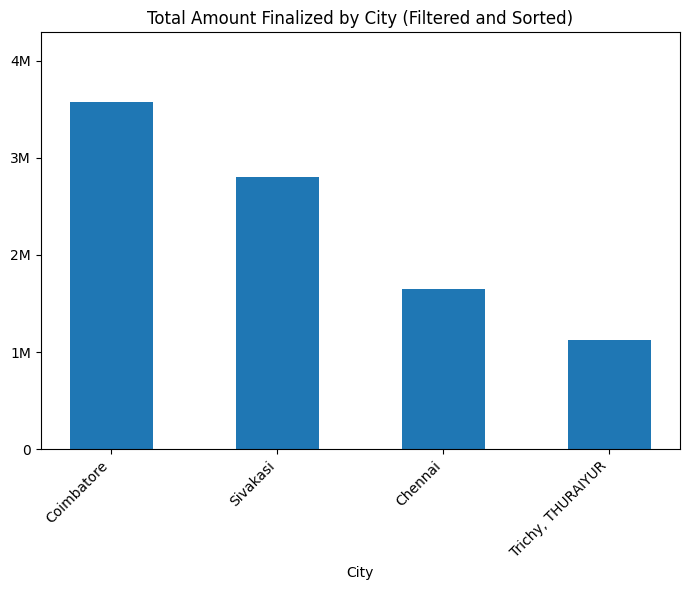

In [8]:

#  DataFrame is named df_sal, and it contains a "City" and an "Amount Finalized" column
city_grouped = df_sal.groupby('Location')['AmountFinalised'].sum().reset_index()

# Set a threshold value below which to exclude bars (e.g., 1 million)
threshold = 1000000

# Filter the data to include only cities with total amount finalized above the threshold
filtered_city_grouped = city_grouped[city_grouped['AmountFinalised'] > threshold]

# Sort the filtered DataFrame by the "AmountFinalised" column in descending order
filtered_city_grouped = filtered_city_grouped.sort_values(by='AmountFinalised', ascending=False)

# Create a bar chart with adjusted bar width and spacing
plt.figure(figsize=(7, 6 ))  # Adjust the figure size as needed

# City names on the x-axis and total amount finalized on the y-axis
x = filtered_city_grouped['Location']
y = filtered_city_grouped['AmountFinalised']

# Adjust the bar width (e.g., 0.8 means 80% of the available space)
bar_width = 0.5  # Adjust the bar width as needed

# Create the bar chart with the specified bar width and spacing
plt.bar(x, y, width=bar_width)

# Label the axes and title
plt.xlabel('City')
plt.title('Total Amount Finalized by City (Filtered and Sorted)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Manually set Y-axis ticks and labels
y_ticks = [0, 1000000, 2000000, 3000000, 4000000]  # Customize the values as needed
y_tick_labels = ['0', '1M', '2M', '3M', '4M']  # Corresponding labels

# Set custom Y-axis ticks and labels
plt.yticks(y_ticks, y_tick_labels)

# Set Y-axis limits dynamically based on the data range
y_max = max(y)
y_min = min(0, min(y))  # Set the lower limit to 0 or the minimum data value
plt.ylim(y_min, y_max + 0.2 * y_max)  # Adjust the factor (0.2) as needed

# Show the plot
plt.tight_layout()
plt.show()


**Value Wise Focus Needed**

In [36]:
ppf = df_sal.groupby('Product Prefered').sum(numeric_only=True)
result_sorted = ppf.sort_values(by='AmountFinalised', ascending=False)
print(result_sorted)
print("Amount Total: ",df_sal['AmountFinalised'].sum())

                  AmountFinalised
Product Prefered                 
Pecho                   7129000.0
Dysorm                  3020000.0
Paga                     155000.0
General                       0.0
Amount Total:  10304000.0


**Product in Focus -Viz**

In [23]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['AmountFinalised'], **{})
chart

**Distribution of Product**

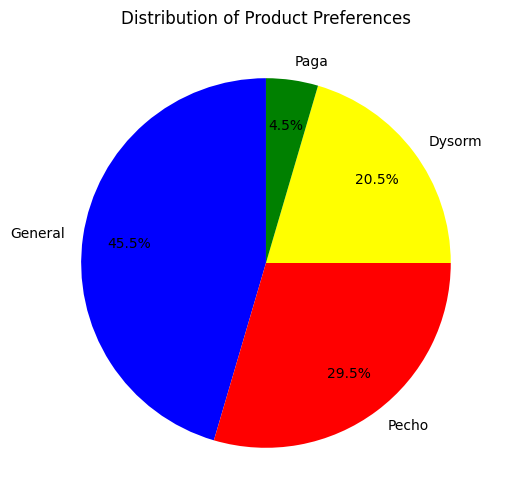

General    20
Pecho      13
Dysorm      9
Paga        2
Name: Product Prefered, dtype: int64


In [19]:
result = df_sal['Product Prefered'].value_counts()

# Define labels and colors for the pie chart
labels = result.index
colors = ['blue', 'red', 'yellow', 'green']  # You can customize the colors as needed

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.pie(result, labels=labels, colors=colors, startangle=90,  autopct='%1.1f%%', pctdistance=0.75)

# Add a title
plt.title('Distribution of Product Preferences')

# Display the pie chart
plt.show()
print(result)

**Quote Vs Budget Cat**

In [37]:
import plotly.express as px

# Assuming result contains the counts of different combinations
result1 = df_sal.groupby(['Budget_Cat', 'Quote Stat']).size().reset_index(name='Count')

# Create a Sunburst chart
fig = px.sunburst(result1, path=['Budget_Cat', 'Quote Stat'], values='Count')

# Update layout and display the chart
fig.update_layout(title=" Budget_Cat vs. Quote Stat")
fig.show()
print(result1)

    Budget_Cat Quote Stat  Count
0        Check  Not_Given     18
1  High_budget  Not_Given     13
2  High_budget    Q_given      5
3   Low_budget  Not_Given      7
4   Low_budget    Q_given      1
